In [1]:
%matplotlib inline
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
sector3_file = "variable_stars/tess-s0003-4-4_97.096787_-65.579312_32x32_astrocut.fits"
sector4_file = "variable_stars/tess-s0004-4-4_97.096787_-65.579312_32x32_astrocut.fits"
sector5_file = "variable_stars/tess-s0005-4-4_97.096787_-65.579312_32x32_astrocut.fits"
sector6_file = "variable_stars/tess-s0006-4-1_97.096787_-65.579312_32x32_astrocut.fits"
sector7_file = "variable_stars/tess-s0007-4-1_97.096787_-65.579312_32x32_astrocut.fits"
sector8_file = "variable_stars/tess-s0008-4-1_97.096787_-65.579312_32x32_astrocut.fits"
sector9_file = "variable_stars/tess-s0009-4-2_97.096787_-65.579312_32x32_astrocut.fits"
sector10_file = "variable_stars/tess-s0010-4-2_97.096787_-65.579312_32x32_astrocut.fits"
sector11_file = "variable_stars/tess-s0011-4-2_97.096787_-65.579312_32x32_astrocut.fits"
# sector12_file = "variable_stars/tess-s0012-4-2_97.096787_-65.579312_32x32_astrocut.fits"

In [4]:
k=100  # number to determine how many chunks to divide each sector into (k-fold X-validation)

Removing 13 bad data points (out of 1288) using the TESS provided QUALITY array


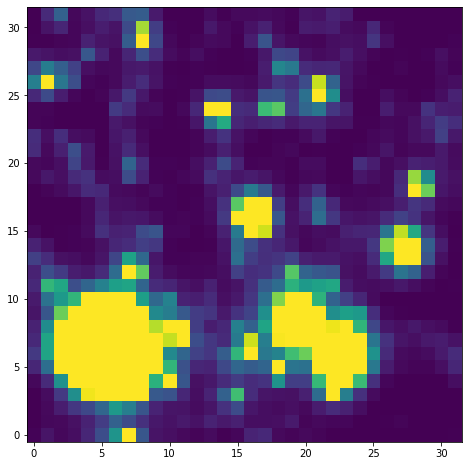

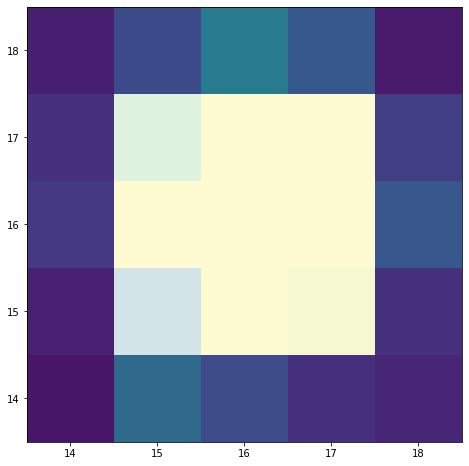

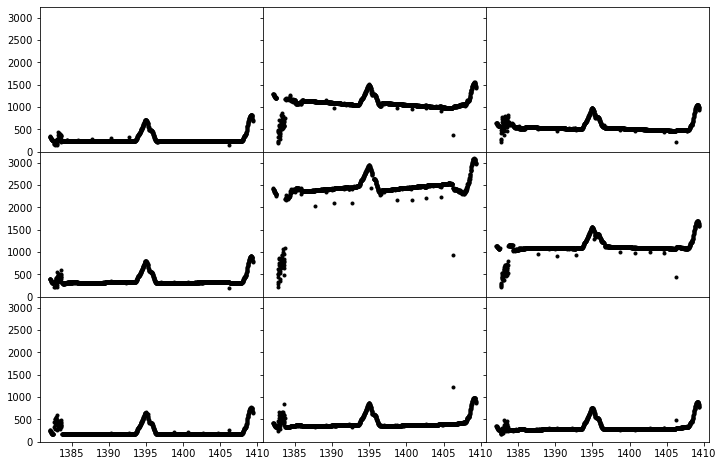

In [5]:
sector3 = tess_cpm.Source(sector3_file, remove_bad=True)
sector3.plot_cutout();
sector3.set_aperture(rowlims=[15, 17], collims=[15, 17])
sector3.plot_cutout(rowlims=[14, 18], collims=[14, 18], show_aperture=True);
sector3.plot_pix_by_pix();
sector3.add_cpm_model();
sector3.add_poly_model();
sector3.set_regs([0.01, 0.1])

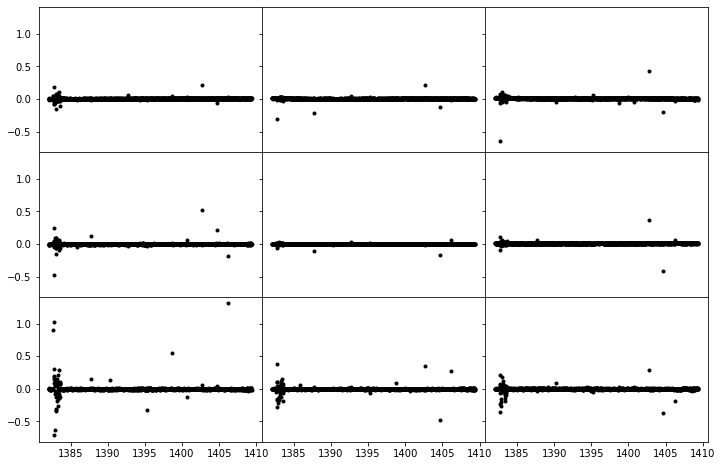

In [6]:
sector3.holdout_fit_predict(k=k);
sector3.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 3 x 3 pixel lightcurves


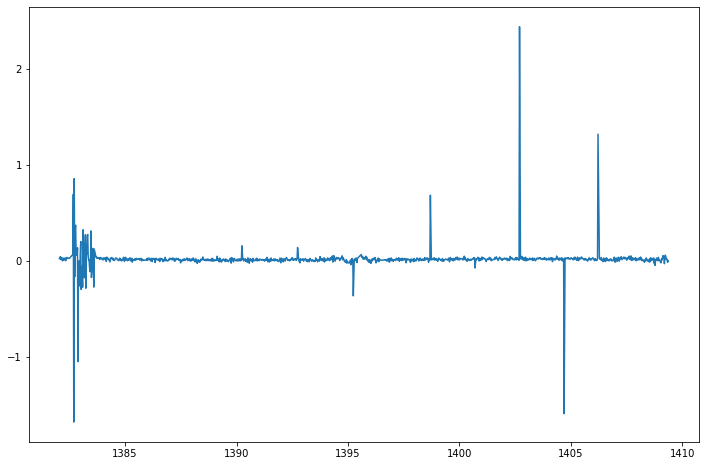

In [7]:
sector3_lc = sector3.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector3.time, sector3_lc)

Removing 14 bad data points (out of 1060) using the TESS provided QUALITY array


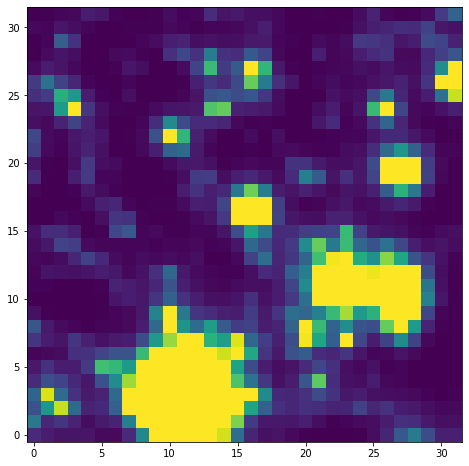

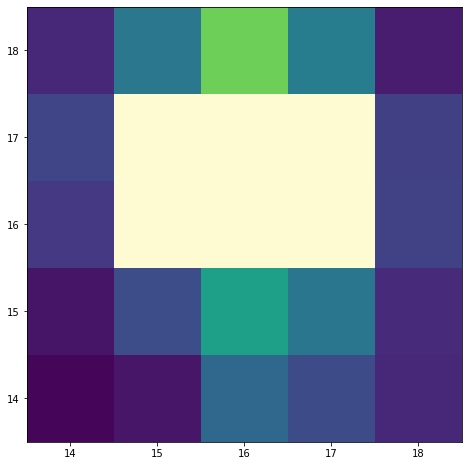

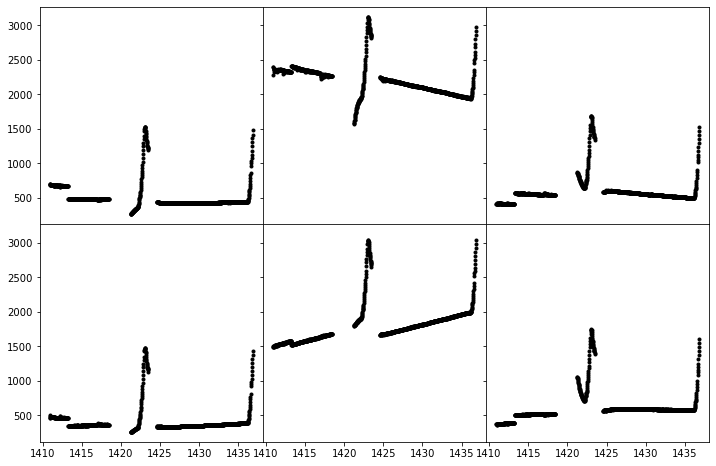

In [8]:
sector4 = tess_cpm.Source(sector4_file, remove_bad=True)
sector4.plot_cutout();
sector4.set_aperture(rowlims=[16, 17], collims=[15, 17])
sector4.plot_cutout(rowlims=[14, 18], collims=[14, 18], show_aperture=True);
sector4.plot_pix_by_pix();
sector4.add_cpm_model();
sector4.add_poly_model();
sector4.set_regs([0.01, 0.1])

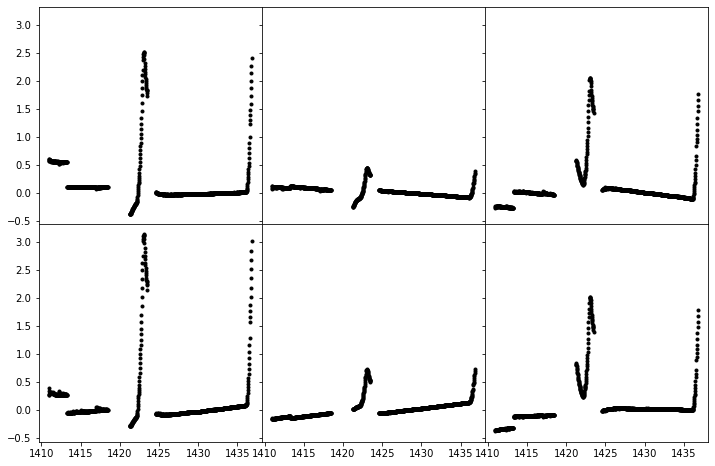

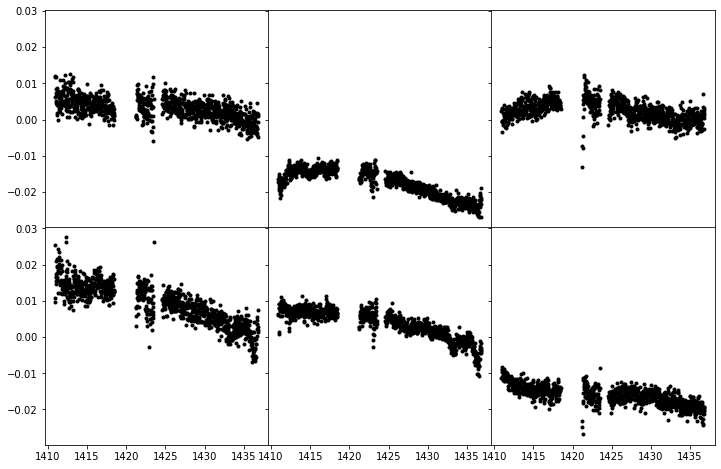

In [9]:
sector4.holdout_fit_predict(k=k);
sector4.plot_pix_by_pix(data_type="cpm_prediction");
sector4.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 2 x 3 pixel lightcurves


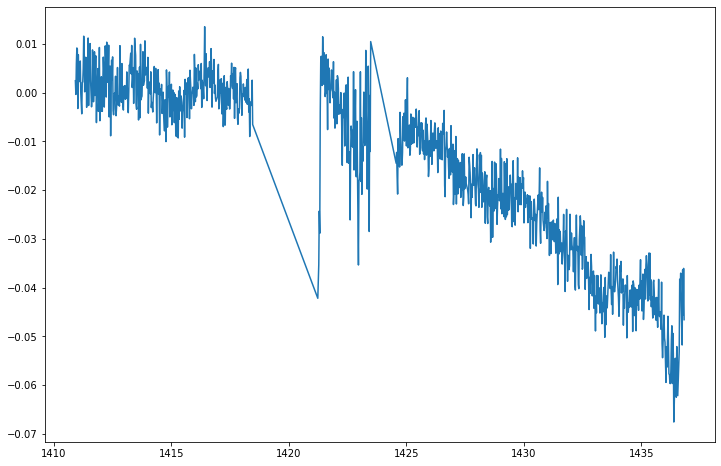

In [10]:
sector4_lc = sector4.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector4.time, sector4_lc)

Removing 23 bad data points (out of 1196) using the TESS provided QUALITY array


/home/soichiro/TESS_data/tess_cpm/cutout_data.py:59: RuntimeWarning: invalid value encountered in true_divide
  self.normalized_fluxes = (self.fluxes / self.flux_medians) - 1
/home/soichiro/TESS_data/tess_cpm/cutout_data.py:64: RuntimeWarning: invalid value encountered in true_divide
  self.normalized_flux_errors = self.flux_errors / self.flux_medians


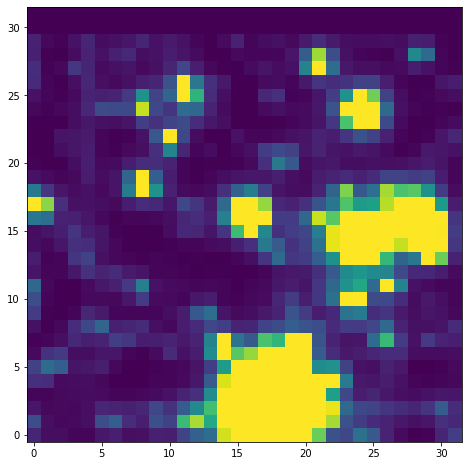

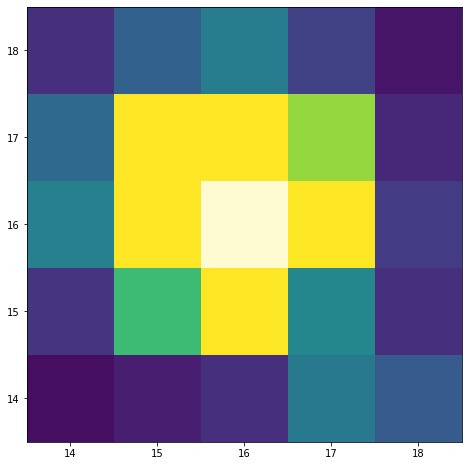

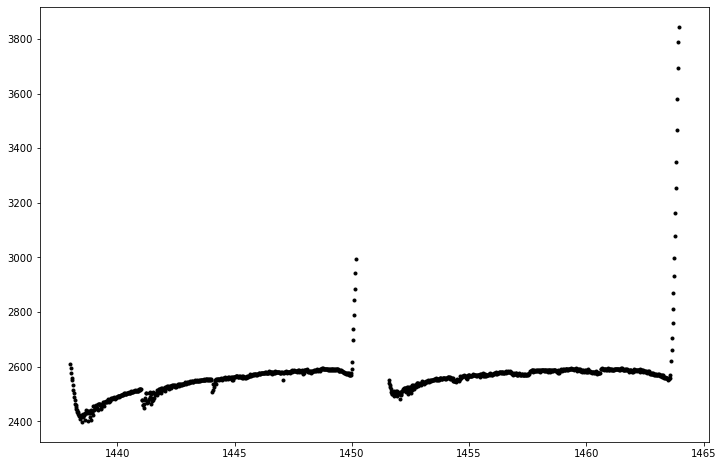

In [11]:
sector5 = tess_cpm.Source(sector5_file, remove_bad=True)
sector5.plot_cutout();
sector5.set_aperture(rowlims=[16, 16], collims=[16, 16])
sector5.plot_cutout(rowlims=[14, 18], collims=[14, 18], show_aperture=True)
sector5.plot_pix_by_pix();
sector5.add_cpm_model();
sector5.add_poly_model();
sector5.set_regs([0.01, 0.01])

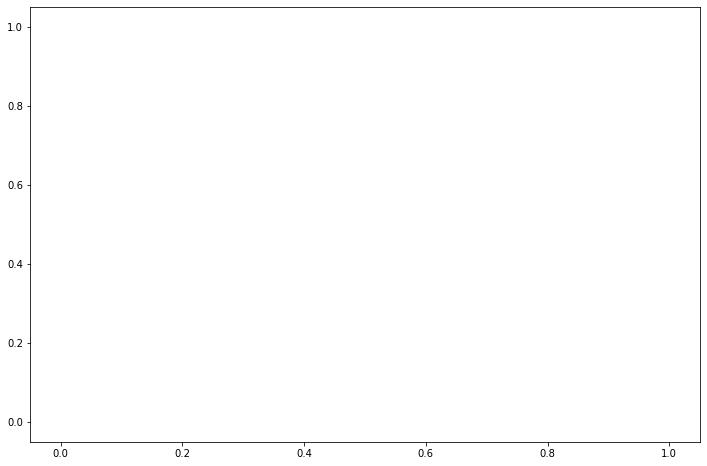

In [12]:
sector5.holdout_fit_predict(k=k);
sector5.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 1 x 1 pixel lightcurves


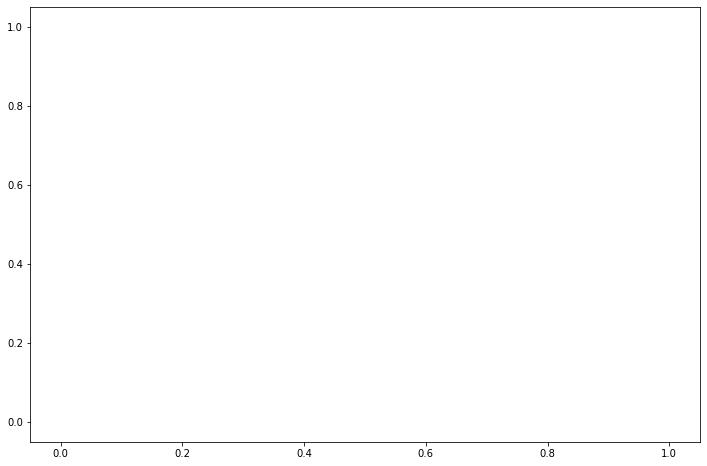

In [13]:
sector5_lc = sector5.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector5.time, sector5_lc)

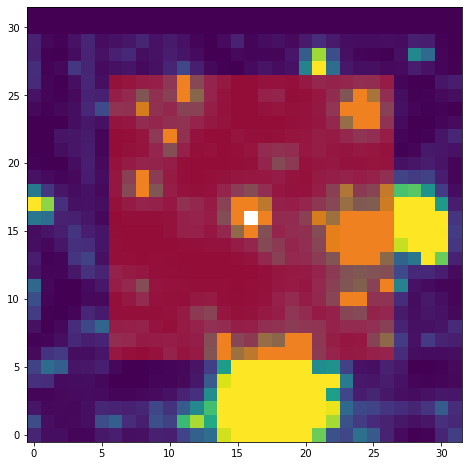

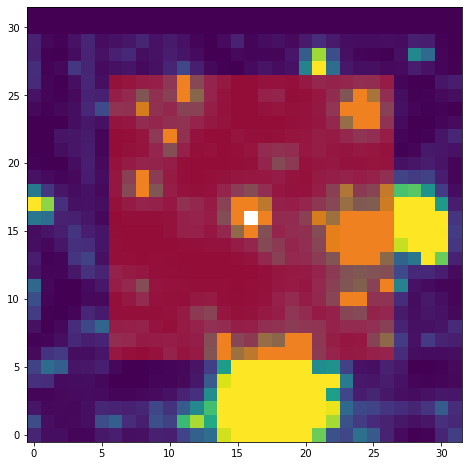

In [14]:
sector5.models[0][0].plot_model()

Removing 6 bad data points (out of 993) using the TESS provided QUALITY array


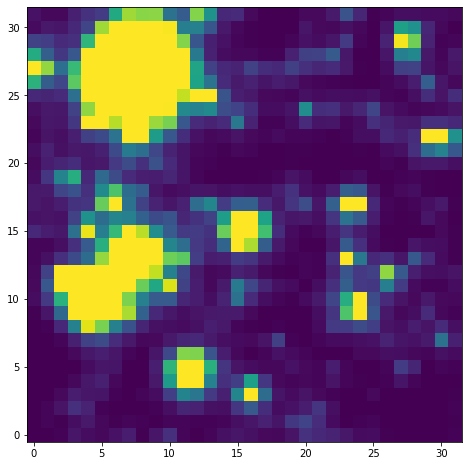

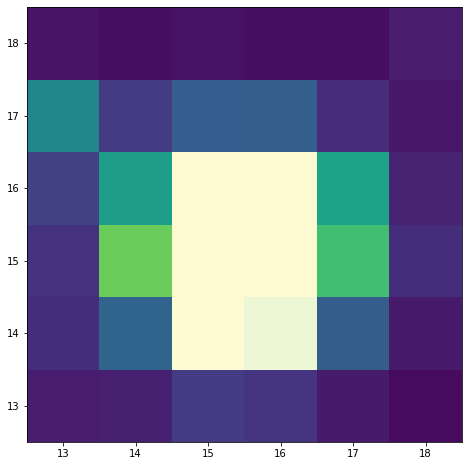

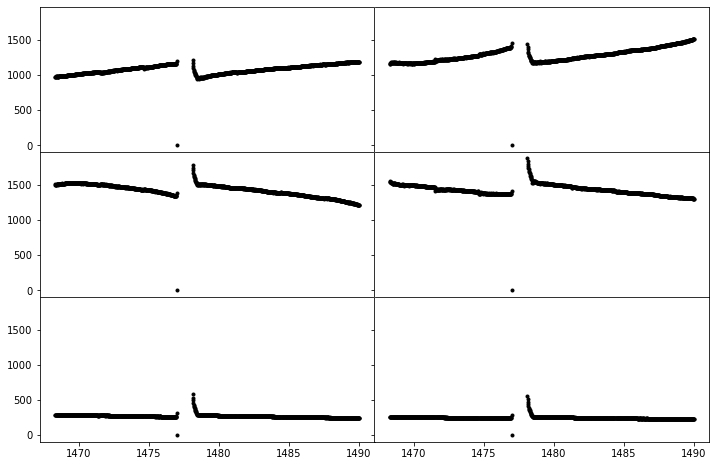

In [15]:
sector6 = tess_cpm.Source(sector6_file, remove_bad=True)
sector6.plot_cutout();
sector6.set_aperture(rowlims=[14, 16], collims=[15, 16])
# sector6.set_aperture(rowlims=[14, 17], collims=[15, 17])

sector6.plot_cutout(rowlims=[13, 18], collims=[13, 18], show_aperture=True)
sector6.plot_pix_by_pix();
sector6.add_cpm_model();
sector6.add_poly_model();
sector6.set_regs([0.0001, 0.1])
# sector6.set_regs([0.01])

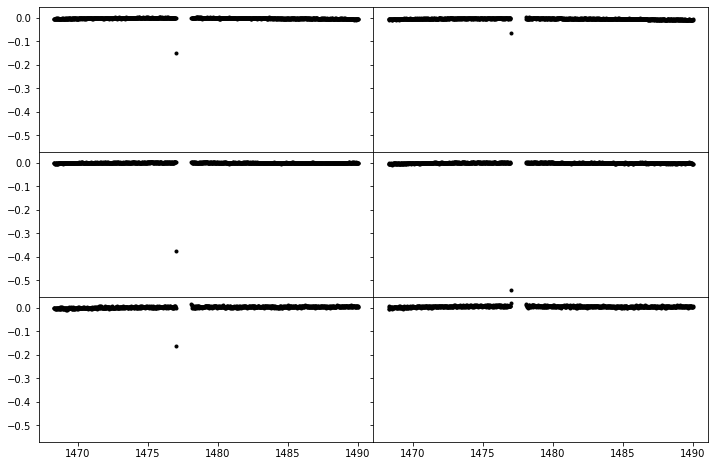

Using user-provided mask. Clipping 1 points.


In [16]:
sector6.holdout_fit_predict(k=k);
sector6.plot_pix_by_pix(data_type="cpm_subtracted_flux");
outliers = sector6.get_outliers(window=10, sigma_upper=5, sigma_lower=0.8)
sector6.holdout_fit_predict(k=k, mask=~outliers);

Summing over 3 x 2 pixel lightcurves


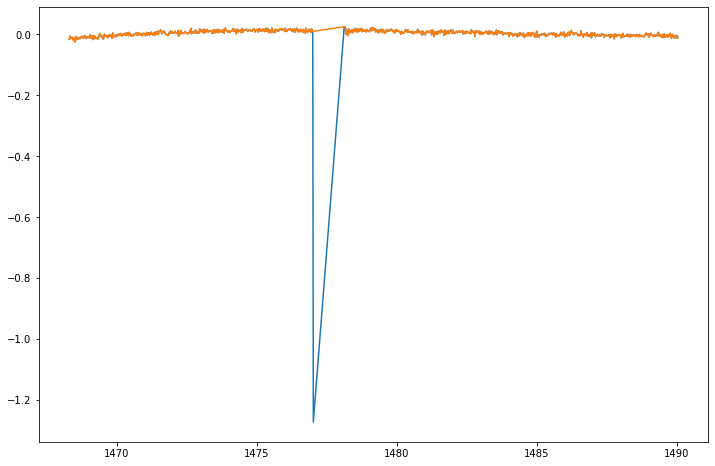

In [17]:
sector6_lc = sector6.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector6.time, sector6_lc)
clip = np.abs(sector6_lc) > 5*np.std(sector6_lc)
plt.plot(sector6.time[~clip], sector6_lc[~clip])

Removing 7 bad data points (out of 1093) using the TESS provided QUALITY array


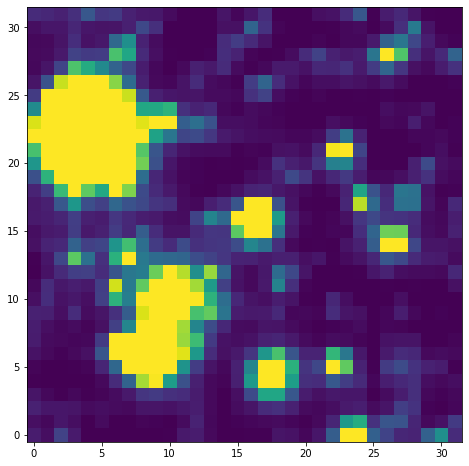

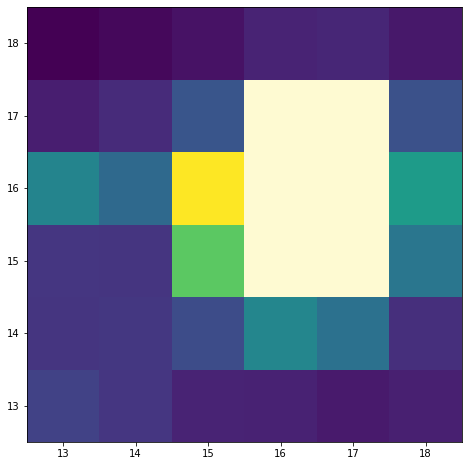

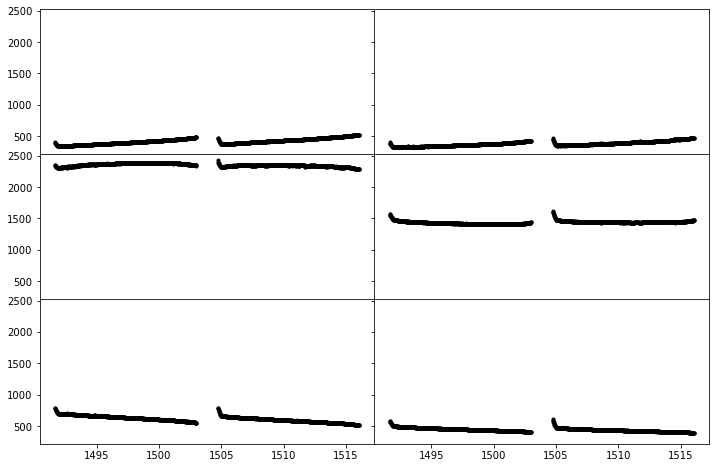

In [18]:
sector7 = tess_cpm.Source(sector7_file, remove_bad=True)
sector7.plot_cutout();
sector7.set_aperture(rowlims=[15, 17], collims=[16, 17])
sector7.plot_cutout(rowlims=[13, 18], collims=[13, 18], show_aperture=True)
sector7.plot_pix_by_pix();
sector7.add_cpm_model();
sector7.add_poly_model();
sector7.set_regs([0.01, 0.1])

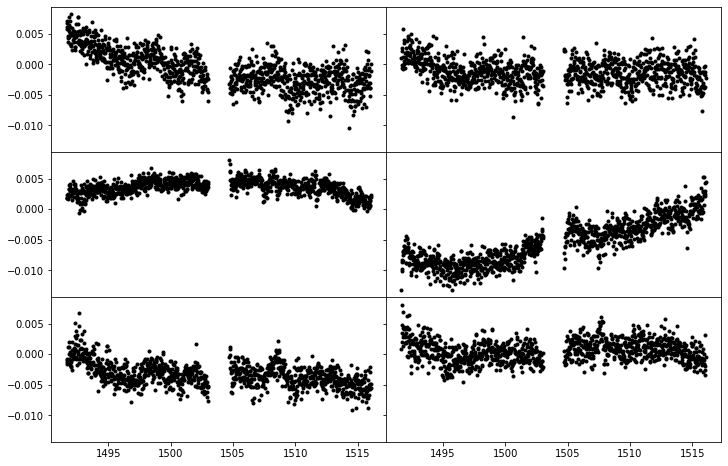

In [19]:
sector7.holdout_fit_predict(k=k);
sector7.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 3 x 2 pixel lightcurves


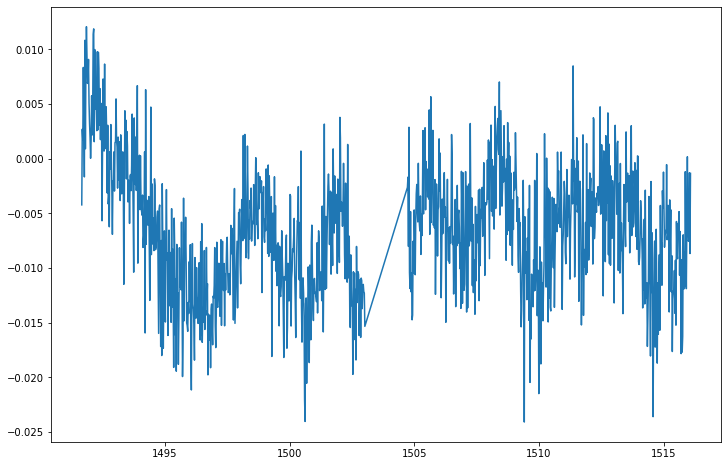

In [20]:
sector7_lc = sector7.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector7.time, sector7_lc)

Removing 16 bad data points (out of 968) using the TESS provided QUALITY array


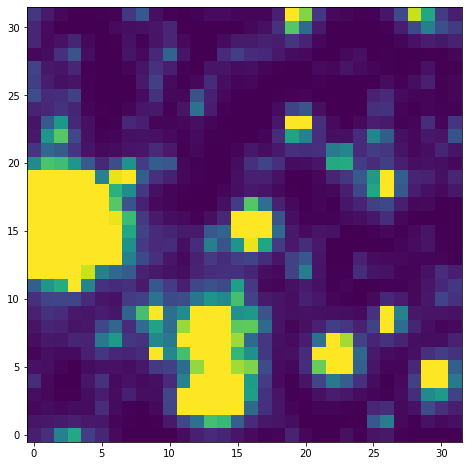

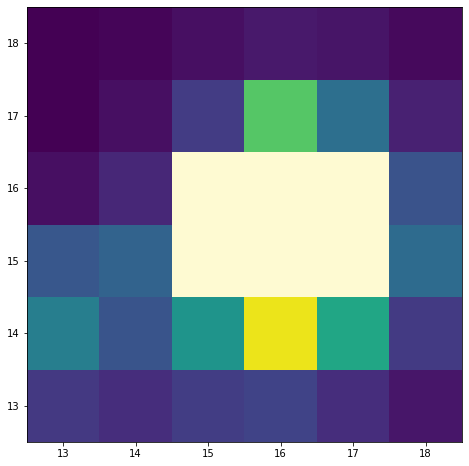

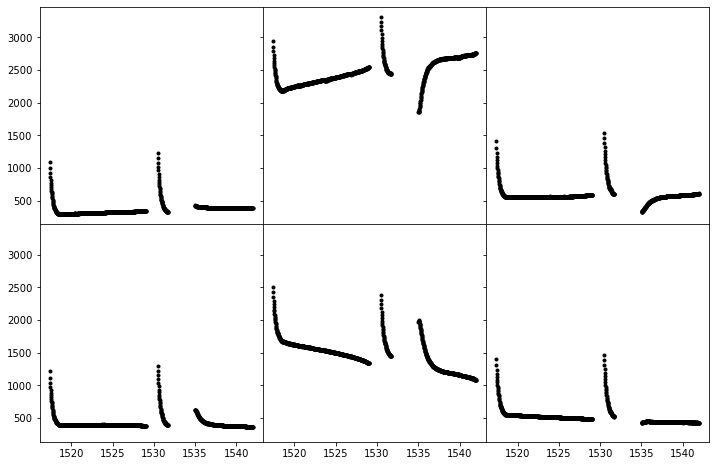

In [21]:
sector8 = tess_cpm.Source(sector8_file, remove_bad=True)
sector8.plot_cutout();
sector8.set_aperture(rowlims=[15, 16], collims=[15, 17])
sector8.plot_cutout(rowlims=[13, 18], collims=[13, 18], show_aperture=True)
sector8.plot_pix_by_pix();
sector8.add_cpm_model();
sector8.add_poly_model();
sector8.set_regs([0.01, 0.1])

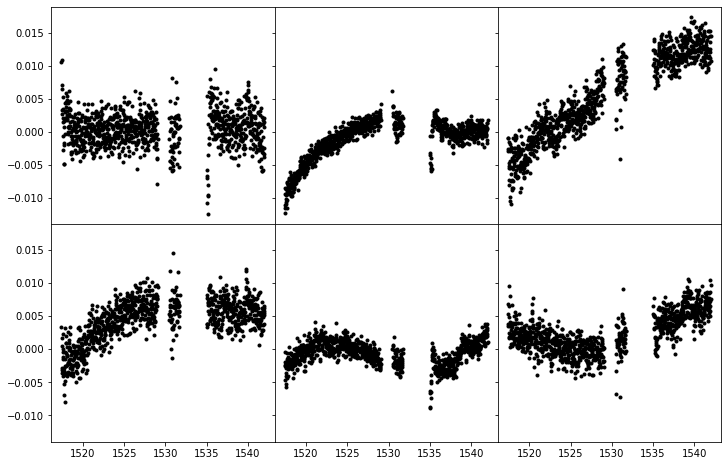

In [22]:
sector8.holdout_fit_predict(k=k);
sector8.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 2 x 3 pixel lightcurves


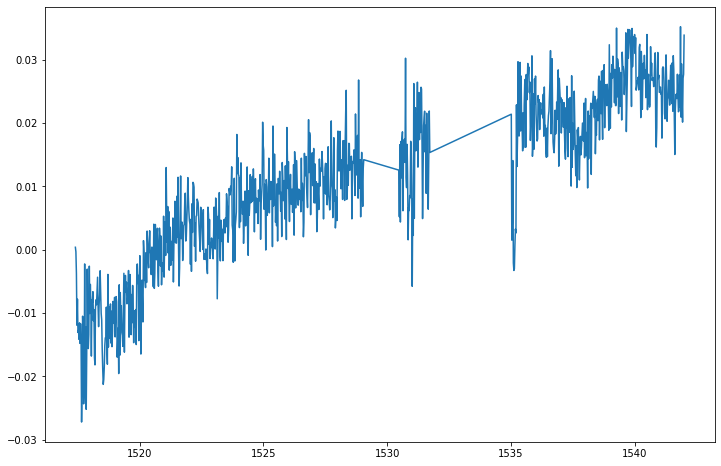

In [23]:
sector8_lc = sector8.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector8.time, sector8_lc)

Removing 69 bad data points (out of 1154) using the TESS provided QUALITY array


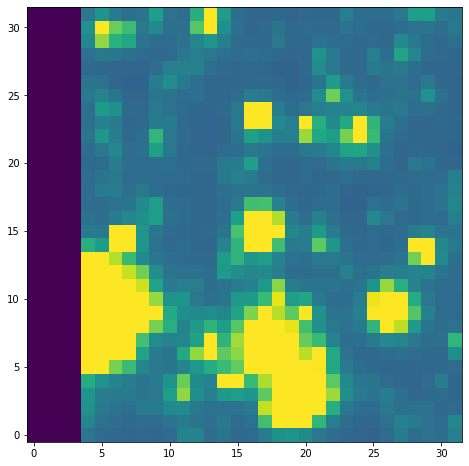

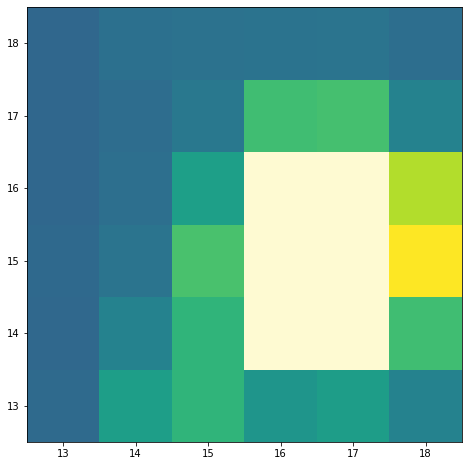

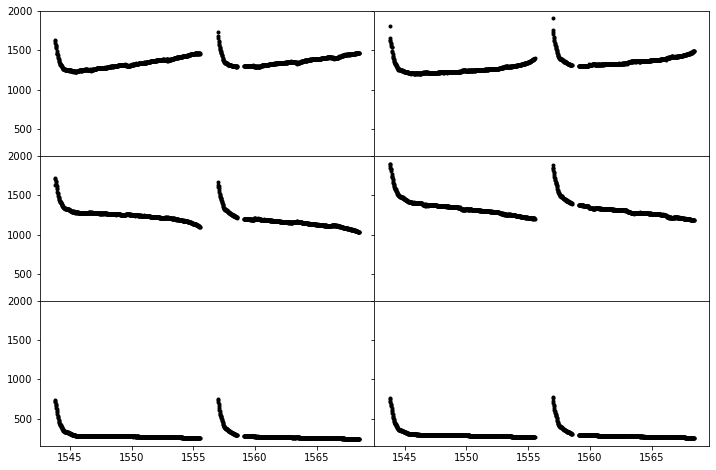

In [24]:
sector9 = tess_cpm.Source(sector9_file, remove_bad=True)
sector9.plot_cutout();
sector9.set_aperture(rowlims=[14, 16], collims=[16, 17])
sector9.plot_cutout(rowlims=[13, 18], collims=[13, 18], show_aperture=True)
sector9.plot_pix_by_pix();
sector9.add_cpm_model();
sector9.add_poly_model();
sector9.set_regs([0.01, 0.1])

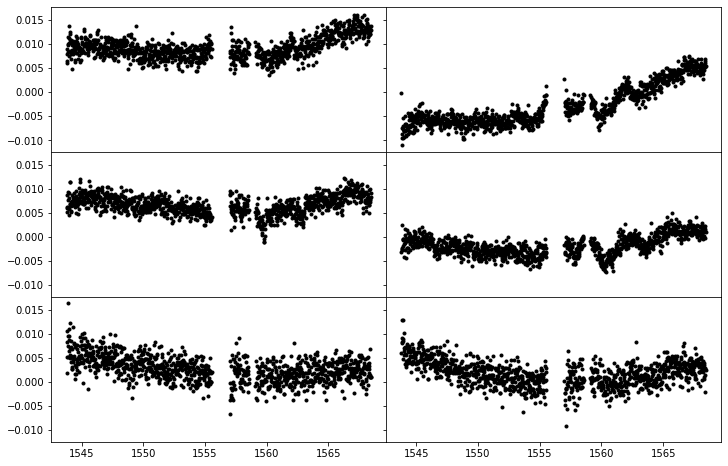

In [25]:
sector9.holdout_fit_predict(k=k);
sector9.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 3 x 2 pixel lightcurves


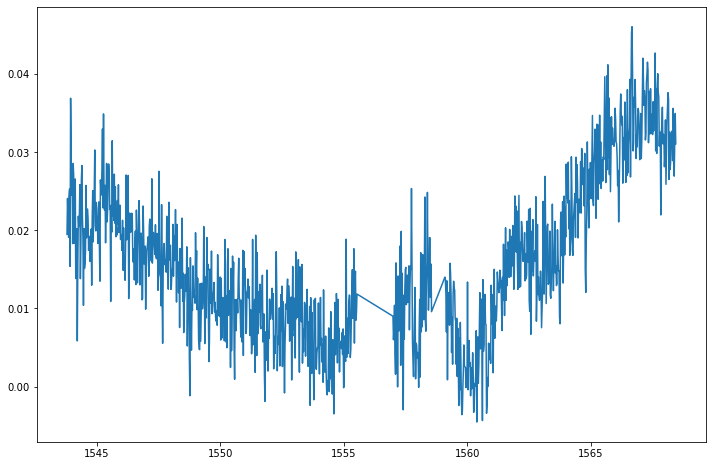

In [26]:
sector9_lc = sector9.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector9.time, sector9_lc)

Removing 6 bad data points (out of 1211) using the TESS provided QUALITY array


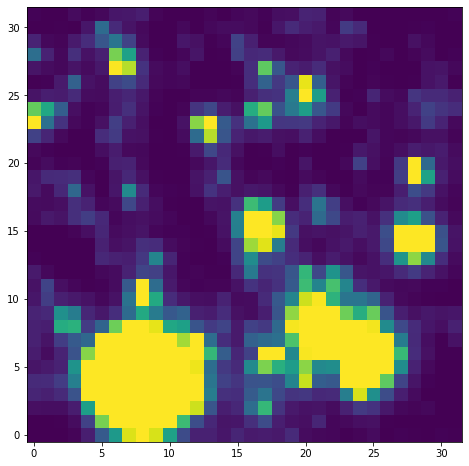

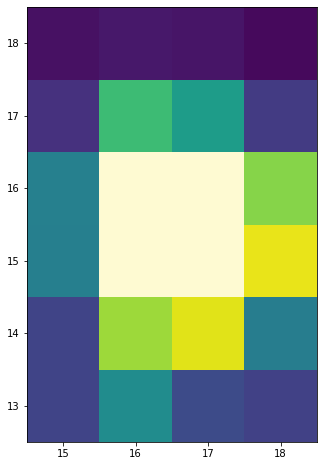

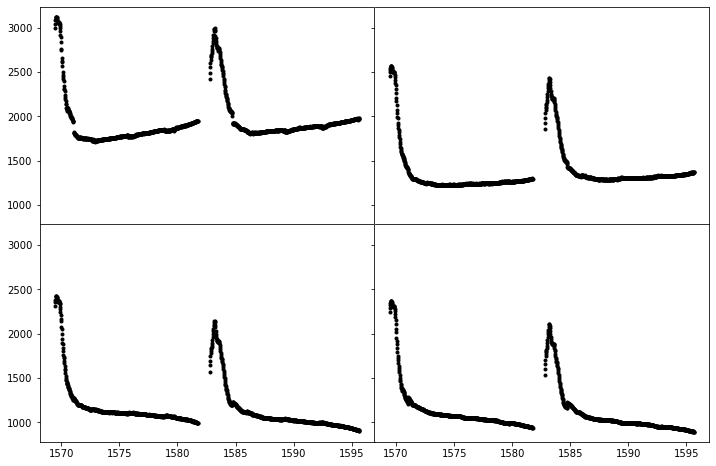

In [27]:
sector10 = tess_cpm.Source(sector10_file, remove_bad=True)
sector10.plot_cutout();
sector10.set_aperture(rowlims=[15, 16], collims=[16, 17])
sector10.plot_cutout(rowlims=[13, 18], collims=[15, 18], show_aperture=True);
sector10.plot_pix_by_pix();
sector10.add_cpm_model();
sector10.add_poly_model();
sector10.set_regs([0.01, 0.1])

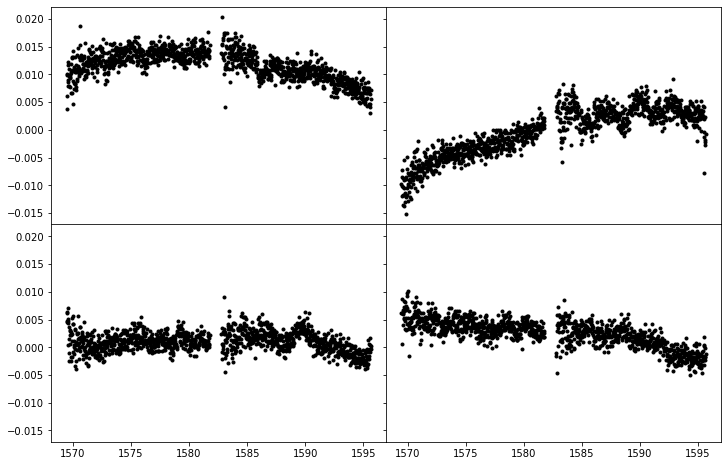

In [28]:
sector10.holdout_fit_predict(k=k);
sector10.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 2 x 2 pixel lightcurves


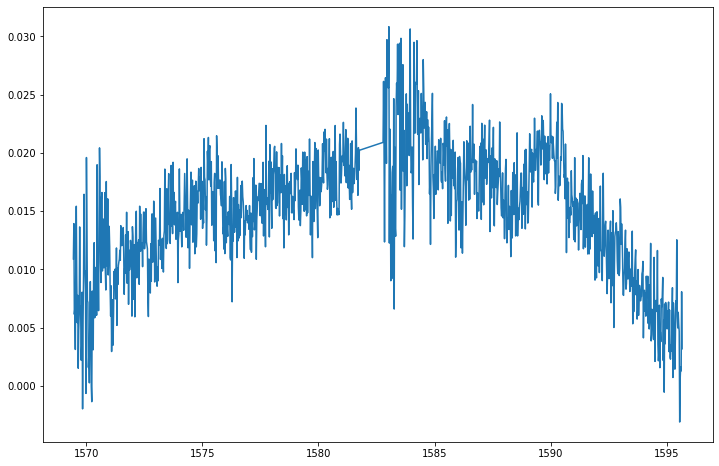

In [29]:
sector10_lc = sector10.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector10.time, sector10_lc)

Removing 7 bad data points (out of 1248) using the TESS provided QUALITY array


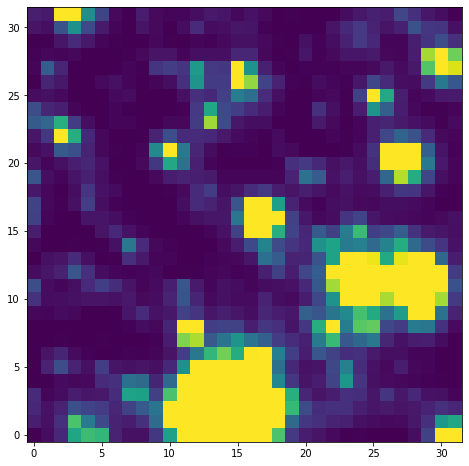

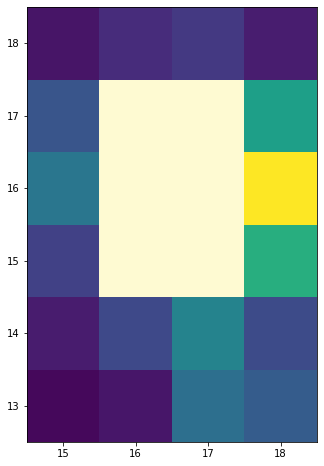

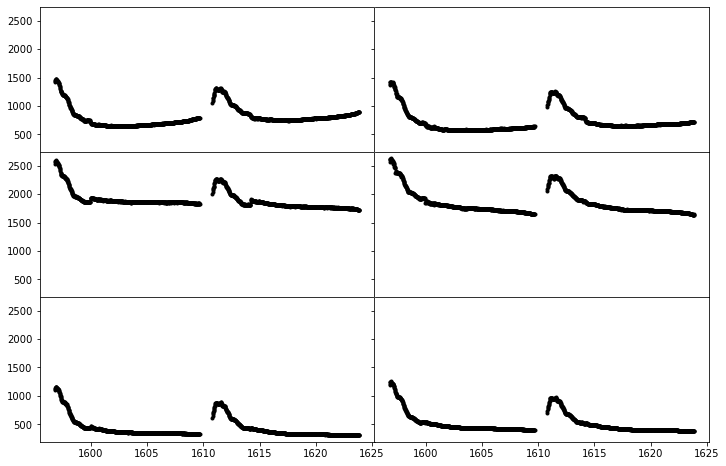

In [30]:
sector11 = tess_cpm.Source(sector11_file, remove_bad=True)
sector11.plot_cutout();
sector11.set_aperture(rowlims=[15, 17], collims=[16, 17])
sector11.plot_cutout(rowlims=[13, 18], collims=[15, 18], show_aperture=True)
sector11.plot_pix_by_pix();
sector11.add_cpm_model();
sector11.add_poly_model();
sector11.set_regs([0.01, 0.1])

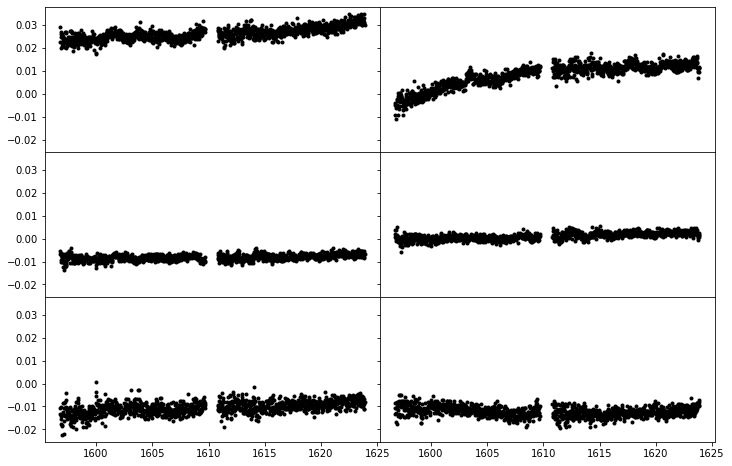

In [31]:
sector11.holdout_fit_predict(k=k);
sector11.plot_pix_by_pix(data_type="cpm_subtracted_flux");

Summing over 3 x 2 pixel lightcurves


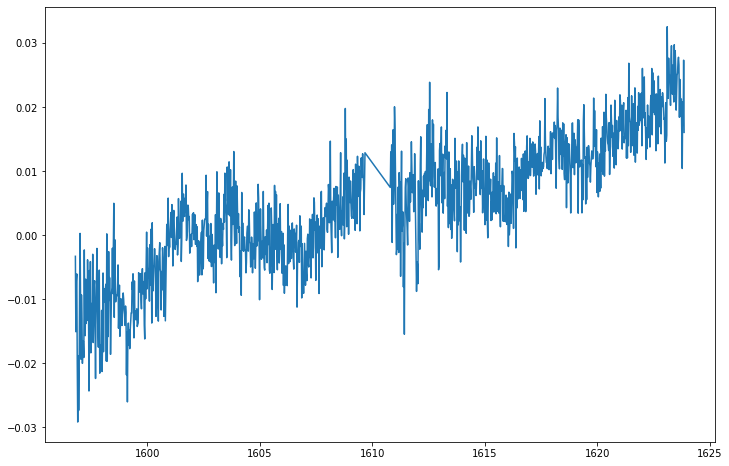

In [32]:
sector11_lc = sector11.get_aperture_lc(data_type="cpm_subtracted_flux")
plt.plot(sector11.time, sector11_lc)

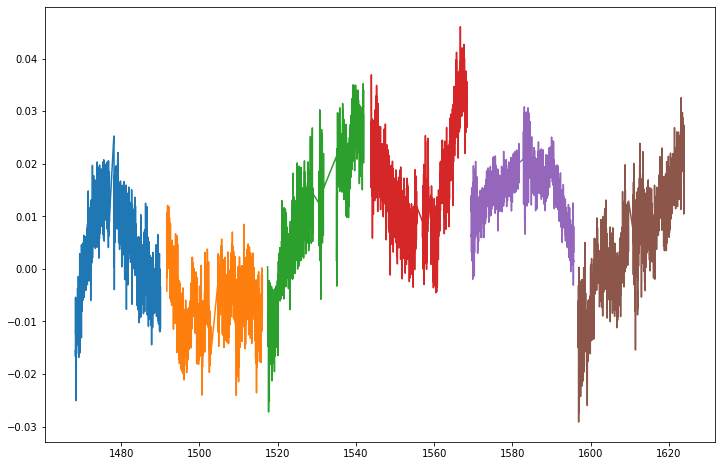

In [33]:
plt.plot(sector6.time[~clip], sector6_lc[~clip])
plt.plot(sector7.time, sector7_lc)
plt.plot(sector8.time, sector8_lc)
plt.plot(sector9.time, sector9_lc)
plt.plot(sector10.time, sector10_lc)
plt.plot(sector11.time, sector11_lc)

In [34]:
# diff1, st1, slc1 = tess_cpm.utils.stitch_sectors(sector6.time[~clip], sector7.time, sector6_lc[~clip], sector7_lc, 2)
# diff2, st2, slc2 = tess_cpm.utils.stitch_sectors(st1, sector8.time, slc1, sector8_lc, 100)
# diff3, st3, slc3 = tess_cpm.utils.stitch_sectors(st2, sector9.time, slc2, sector9_lc, 100)
# diff4, st4, slc4 = tess_cpm.utils.stitch_sectors(st3, sector10.time, slc3, sector10_lc, 100)
# diff5, st5, slc5 = tess_cpm.utils.stitch_sectors(st4, sector11.time, slc4, sector11_lc, 100)
# # diff, st4, slc4 = tess_cpm.utils.stitch_sectors(st3, sector12.time, slc3, sector12_lc, 100)

In [35]:
diff1, st1, slc1 = tess_cpm.utils.stitch_sectors(sector7.time, sector8.time, sector7_lc, sector8_lc, 100)
diff2, st2, slc2 = tess_cpm.utils.stitch_sectors(st1, sector9.time, slc1, sector9_lc, 100)
diff3, st3, slc3 = tess_cpm.utils.stitch_sectors(st2, sector10.time, slc2, sector10_lc, 100)
diff4, st4, slc4 = tess_cpm.utils.stitch_sectors(st3, sector11.time, slc3, sector11_lc, 100)
# diff5, st5, slc5 = tess_cpm.utils.stitch_sectors(st4, sector11.time, slc4, sector11_lc, 100)

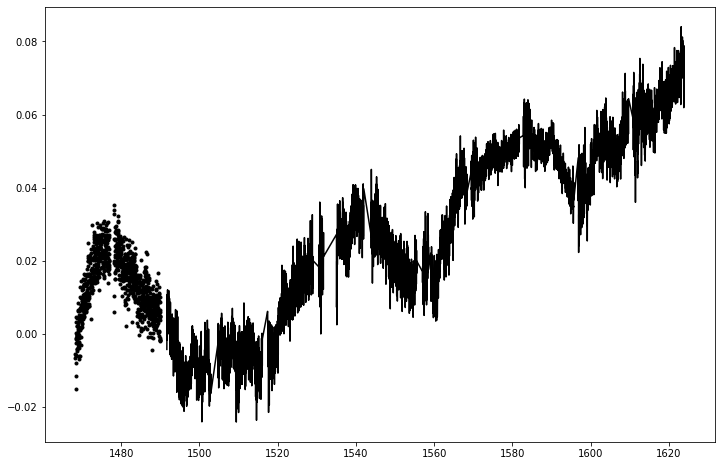

In [36]:
plt.plot(sector6.time[~clip], sector6_lc[~clip]+0.01, ".", c="k")
plt.plot(st4, slc4, c="k")
plt.plot()

cheat_stitch_time = np.concatenate((sector6.time[~clip], st4))
cheat_stitch_flux = np.concatenate((sector6_lc[~clip]+0.01, slc4))

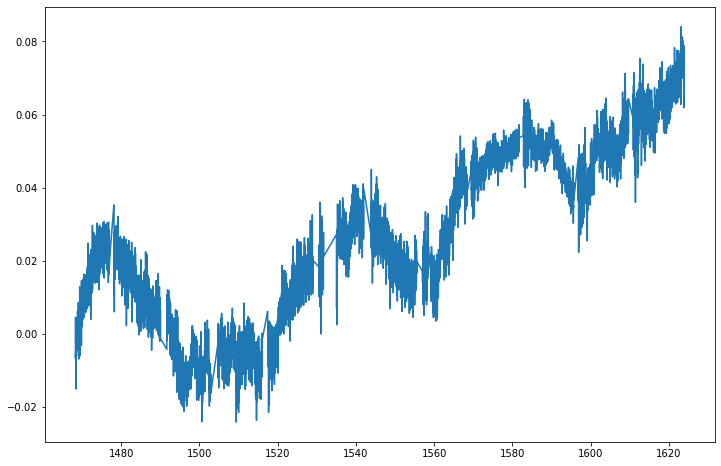

In [37]:
plt.plot(cheat_stitch_time, cheat_stitch_flux)

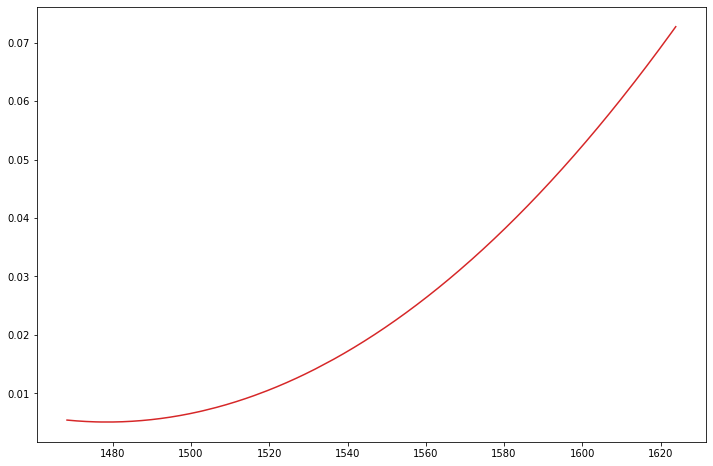

In [38]:
p = np.polyfit(cheat_stitch_time, cheat_stitch_flux, 2)
# plt.plot(cheat_stitch_time, fit)
fit = p[0]*cheat_stitch_time**2 + p[1]*cheat_stitch_time + p[2]
fit
plt.plot(cheat_stitch_time , fit, c="C3")

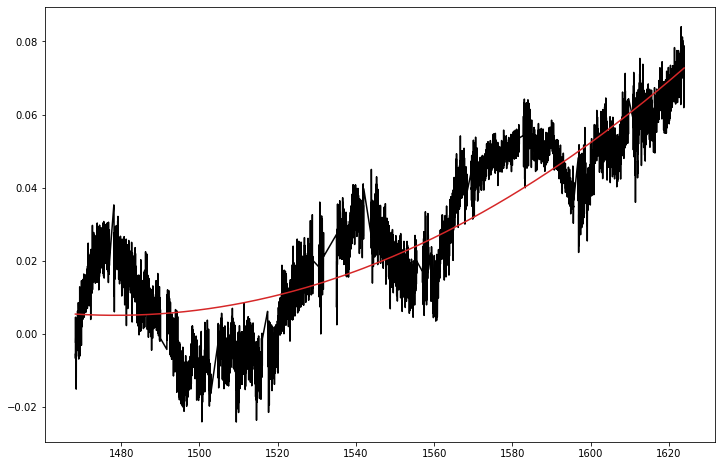

In [39]:
plt.plot(cheat_stitch_time, cheat_stitch_flux, c="k")
plt.plot(cheat_stitch_time, fit, "-",c="C3")

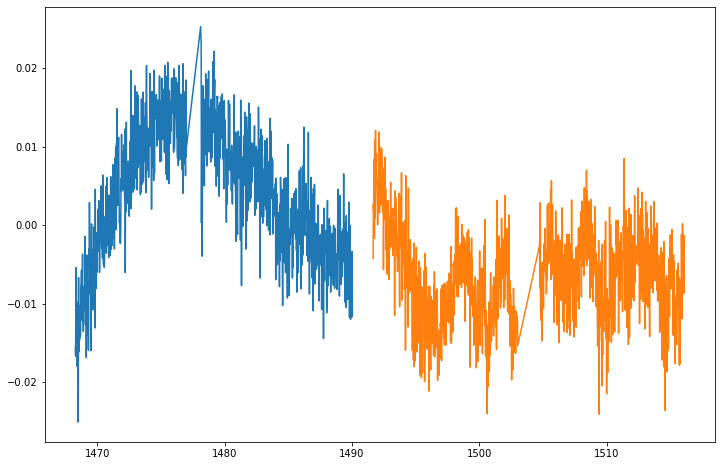

In [40]:
plt.plot(sector6.time[~clip], sector6_lc[~clip])
plt.plot(sector7.time, sector7_lc)
# plt.plot(st1, slc1, ".")

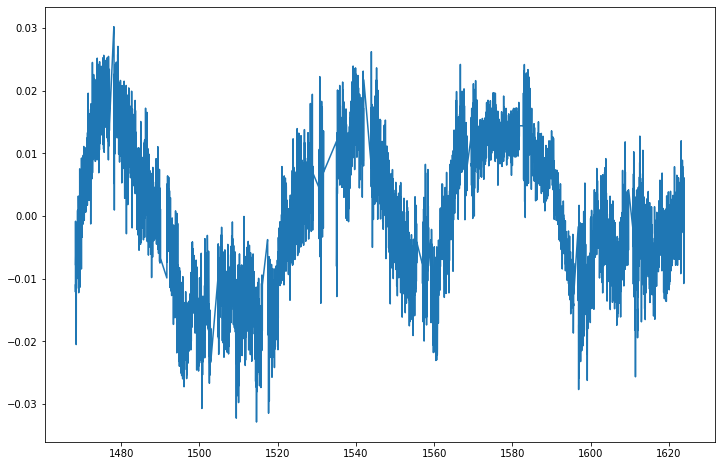

In [41]:
trend_rm = cheat_stitch_flux - fit
plt.plot(cheat_stitch_time, trend_rm)

Max Power Period: 50.18814579133064 d


Text(0.5, 1.0, 'Folded Lightcurve with Period: 50.1881 d')

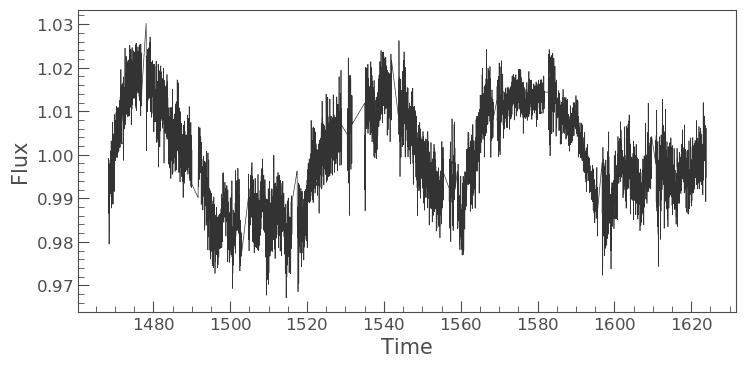

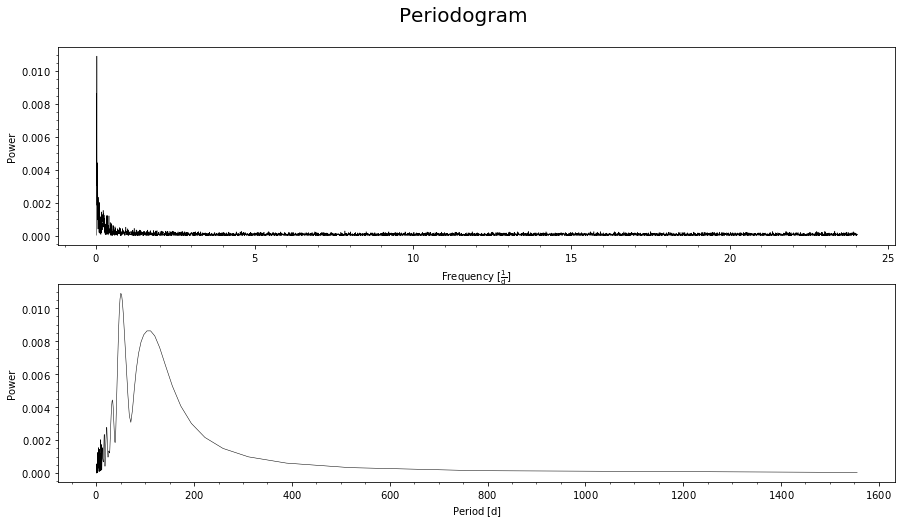

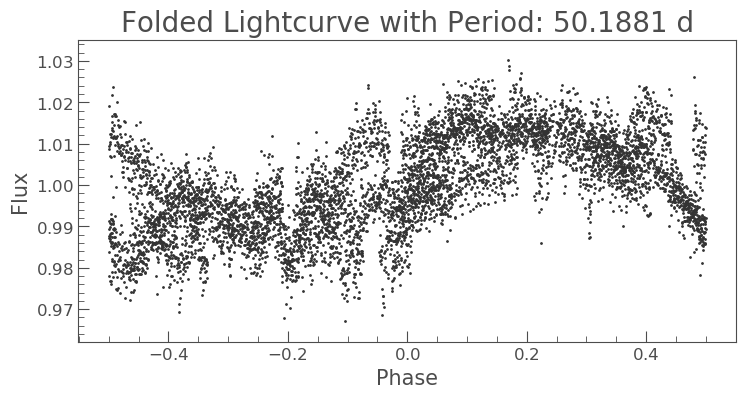

In [42]:
l = lk.LightCurve(time=cheat_stitch_time, flux=trend_rm+1)
# l = l.bin()
l.plot()

pg = l.to_periodogram(oversample_factor=10)
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
pg.plot(ax=axs[0], c='k')
pg.plot(ax=axs[1], c='k', view='period')
fig.suptitle("Periodogram", fontsize=20, y=0.95)
period = pg.period_at_max_power
print(f"Max Power Period: {period}")
f_lc = l.fold(period.value*1, t0=1570)
f_lc.scatter()
freq = pg.frequency_at_max_power
plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)

50.18814579133064


Text(0.5, 1.0, 'TOI 700 (TIC 150428135)')

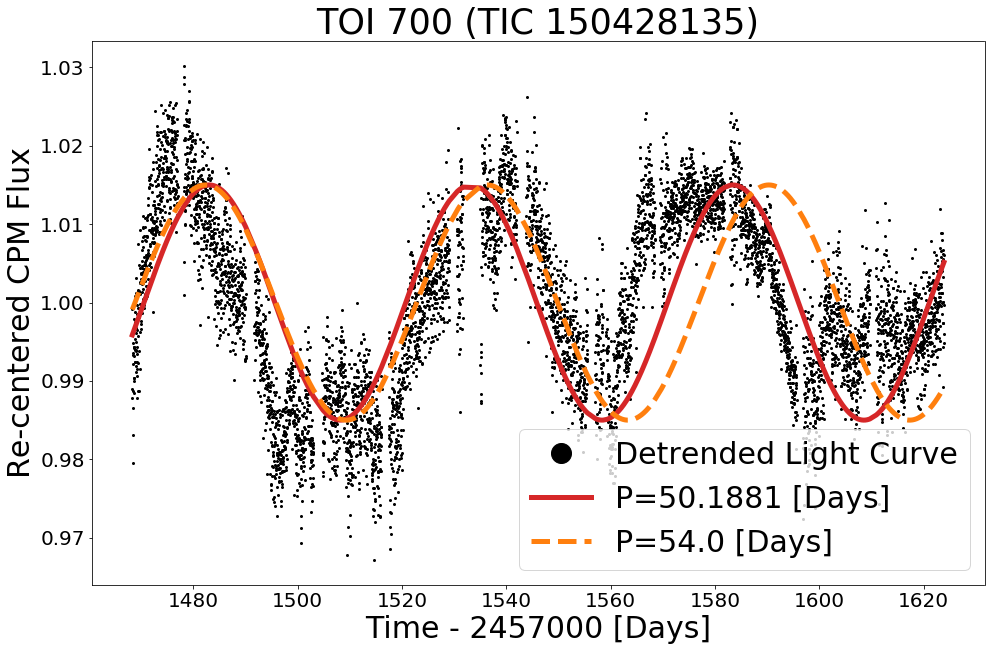

In [43]:
plt.figure(figsize=(16, 10))
plt.plot(l.time, l.flux, ".", ms=4, c="k", label="Detrended Light Curve")
# plt.plot(f_lc.phase, 0.01*np.sin(2*np.pi*cheat_stitch_time/50.1881+0.5*np.pi)+1, ".", c="red", lw=10, label="")
print(period.value)
phase = (2*np.pi/period.value)*cheat_stitch_time
true_phase = (2*np.pi/54)*cheat_stitch_time
# plt.plot(phase, 0.01*np.sin(phase)+1, ".",c="red", lw=10, label="")
plt.plot(l.time, 0.015*np.sin(phase+1.4*np.pi)+1, "-",c="C3", lw=5, label="P=50.1881 [Days]")
plt.plot(l.time, 0.015*np.sin(true_phase+1.6*np.pi)+1, "--",c="C1", lw=5, label="P=54.0 [Days]")

plt.legend(fontsize=30, markerscale=10);
plt.tick_params(labelsize=20);
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("Re-centered CPM Flux", fontsize=30)
plt.title("TOI 700 (TIC 150428135)", fontsize=35)
# plt.savefig("TOI-700.png", dpi=200)

In [ ]:
f_lc.plot()
print(f_lc.flux.size, cheat_stitch_flux.size)

In [ ]:
plt.plot(cheat_stitch_time)

In [ ]:
plt.plot(f_lc.time_original)

In [ ]:
plt.plot(st5, slc5, c="k")
plt.plot(sector6.time[~clip], sector6_lc[~clip])
plt.plot(sector6.time[~clip], sector6_lc[~clip] + diff1)
# plt.plot(sector6.time[~clip], sector6_lc[~clip] - diff1)
plt.plot(st5, slc5, c="k")


In [ ]:
lc = lk.LightCurve(time=np.concatenate((sector6.time[~clip], st4)), flux=np.concatenate((sector6_lc[~clip]+0.01, slc4)))
# lc = lc.flatten()
lc.plot()

# lc.to_csv("cpm_stitched_lc_toi700.csv")

# pg = lc.to_periodogram(oversample_factor=100)
# fig, axs = plt.subplots(2, 1, figsize=(15, 8))
# pg.plot(ax=axs[0], c='k')
# pg.plot(ax=axs[1], c='k', view='period')
# fig.suptitle("Periodogram", fontsize=20, y=0.95)
# period = pg.period_at_max_power
# print(f"Max Power Period: {period}")
# lc.fold(period.value*1).scatter()
# plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)

In [ ]:
sector10 = tess_cpm.Source(sector10_file, remove_bad=True)
sector10.plot_cutout();
sector10.set_aperture(rowlims=[15, 17], collims=[16, 18])
sector10.plot_cutout(rowlims=[13, 19], collims=[13, 19], show_aperture=True)
sector10.plot_pix_by_pix();
sector10.add_cpm_model();
sector10.add_poly_model();
sector10.set_regs([0.01, 0.1])

In [ ]:
sector10.holdout_fit_predict(k=50);
sector10.plot_pix_by_pix(data_type="cpm_subtracted_flux");

In [ ]:
sector10_lc = sector10.get_aperture_lc(data_type="cpm_subtracted_flux")

In [ ]:
plt.plot(sector10.time, sector10_lc, c="k")

In [ ]:
sector11 = tess_cpm.Source(sector11_file, remove_bad=True)
sector11.plot_cutout();
sector11.set_aperture(rowlims=[15, 17], collims=[15, 18])
sector11.plot_cutout(rowlims=[13, 19], collims=[13, 19], show_aperture=True)
sector11.plot_pix_by_pix();
sector11.add_cpm_model();
sector11.add_poly_model();
sector11.set_regs([0.01, 0.1])

In [ ]:
plt.plot(sector8.time, sector8_lc)
plt.plot(sector9.time, sector9_lc)
plt.plot(sector10.time, sector10_lc)

In [ ]:
f = "variable_stars/tess-s0011-2-1_187.917900_-59.423900_100x100_astrocut.fits"  # * 35 Cru -- Classical Cepheid (delta Cep type)

In [ ]:
# cpm = tess_cpm.CPM(f, remove_bad=True)
# cpm.set_target_exclusion_predictors(50, 50)
# cpm.xval(0.5);

In [ ]:
# v = tess_cpm.CPM(f, remove_bad=True)
cpm_periodogram(f, t_row=50, t_col=48)

In [ ]:
v.set_poly_model(1, 4, 0.5)
v.set_target(51, 49)
v.set_exclusion(10)
v.set_predictor_pixels(256)

In [ ]:
v.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(v, 20, subtract_polynomials=True)

In [ ]:
v.get_aperture_lc(show_pixel_lc=True, show_aperture_lc=True)

type(None)

In [ ]:
v.sigma_clip_process(3)
tess_cpm.summary_plot(v, 20, subtract_polynomials=True)